# 7.3.1 Ensambles de Modelos

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/oQYYx9ZMync?si=Iq_Fal0BeHRtBwyC

La idea de combinar los resultados de varios modelos no es nueva; esta es conocida en la literatura de redes neuronales como ensambles de modelos, y en estadística como combinación de pronósticos. En esta lección se presentan los fundamentos de esta metodología y algunos de los modelos derivados a partir de esta idea.

## 7.3.1.1 Definición

Un ensamble es un tipo de modelo que permite la combinación de varios modelos de predicción para obtener un solo pronóstico basado en los pronósticos individuales de cada modelo. En la figura siguiente se presenta un esquema ilustrativo.

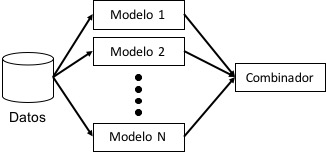

La clave de la operación de esta metodología se basa en la diversidad, la cual puede obtenerse de diferentes formas:

- Variando los datos de entrenamiento: se usa el mismo modelo en todos los casos, pero para cada uno de ellos se usa una muestra de entrenamiento obtenida por boostraping; así cada modelo tiene parámetros diferentes ya que fue estimado sobre una muestra diferente.

- Variando la configuración del modelo: se usan exactamente los mismos datos de entrenamiento, pero sobre diferentes modelos obtenidos variando su configuración; por ejemplo, el mismo modelo pero con diferente configuración (entradas usadas, complejidad, etc). Inclusive se pueden utilizar distintos modelos.

- Una combinación de los dos anteriores.

El combinador es un mecanismo que obtiene un único pronóstico a partir de los pronósticos individuales de cada modelo. Para problemas de clasificación, la conbinación se hace por votación. En problemas de regresión, mediante promedio simple, promedio combinado o, inclusive, regresión.

Diferentes metodologías se han desarrollado sobre este concepto.

## 7.3.1.2 Bagging (Bootstrap aggregation)

En esta metodología, la diversidad se obtiene al entrenar un mismo modelo sobre diferentes conjuntos de entrenamiento usando bootstraping. La combinación se hace por votación para problemas de clasificación y por promedio para problemas numéricos.

## 7.3.1.3 AdaBoosting (Adaptive Boosting)

En este caso, los conjuntos de dato son diseñados especificamente para generar modelos complementarios. De forma simplificada, el algoritmo procede de la siguiente forma:

- Paso 1: Se construye un clasificador sobre todos los datos de entrenamiento.
- Paso 2: Se construye un nuevo conjunto de datos con los ejemplos mal clasificados (o una porción de ellos).
- Paso 3: se construye un nuevo clasificador con los datos obtenidos en el paso 2.
- Paso 4: Se retorna al Paso 2.

El proceso itera hasta que se alcanza una precisión requerida o el número máximo de clasificadores permitidos en el ensamble. La ponderación se realiza dando más peso a los modelos con mejor desempeño, de tal forma, que el desempeño es, al menos, similar al del mejor clasificador obtenido.

## 7.3.1.4 Random forest

En este método se combinan el bagging con la selección aleatoria de caracteríticas para aumetar la diversidad. La salida del modelo se obtiene por votación. Cada ejemplo que no es considerado durante el entrenamiento es usado como parte del conjunto de prueba.

## 7.3.1.5 Carga y preparación

In [17]:
columns = ['checking_balance','months_loan_duration','credit_history','purpose','amount','savings_balance',
'employment_length','installment_rate','personal_status','other_debtors','residence_history',
'property','age','installment_plan','housing','existing_credits','dependents','telephone',
'foreign_worker','job']

# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 

# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets

X.columns = columns
y.columns = ['default']

In [18]:
#
# Se construye un codificador para transformar
# los strings a enteros (similar a factores en R)
#
enc = LabelEncoder()

#
# Se aplica el codificador a las columnas
# del dataset
#
columns = [
    "checking_balance",
    "credit_history",
    "purpose",
    "savings_balance",
    "employment_length",
    "personal_status",
    "other_debtors",
    "property",
    "installment_plan",
    "housing",
    "dependents",
    "telephone",
    "foreign_worker",
    "job",
]

for column in columns:
    X[column] = enc.fit_transform(X[column])

In [19]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## 7.3.1.6 Construcción de modelos y métricas de desempeño

In [20]:
#
# Bagging
#

y_test_pred_GradientBoosting = (
    GradientBoostingClassifier(n_estimators=10)
    .fit(X_train, y_train)
    .predict(X_test)
)

#
# AdaBoosting
#

y_test_pred_AdaBoost = (
    AdaBoostClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test)
)

#
# Random Forest
#

y_test_pred_RandomForest = (
    RandomForestClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test)
)

In [26]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_test_pred_GradientBoosting)
print(f'Accuracy: {accuracy:.2f}')

# Calcular la sensibilidad (recall)
recall = recall_score(y_test, y_test_pred_GradientBoosting)
print(f'Recall: {recall:.2f}')

# Imprimir el informe de clasificación
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred_GradientBoosting))

confusion_matrix(y_test, y_test_pred_GradientBoosting)

Accuracy: 0.76
Recall: 0.97

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.97      0.85        71
           2       0.78      0.24      0.37        29

    accuracy                           0.76       100
   macro avg       0.77      0.61      0.61       100
weighted avg       0.76      0.76      0.71       100



array([[69,  2],
       [22,  7]], dtype=int64)

In [29]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_test_pred_AdaBoost)
print(f'Accuracy: {accuracy:.2f}')

# Calcular la sensibilidad (recall)
recall = recall_score(y_test, y_test_pred_AdaBoost)
print(f'Recall: {recall:.2f}')

# Imprimir el informe de clasificación
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred_AdaBoost))

confusion_matrix(y_test, y_test_pred_AdaBoost)

Accuracy: 0.75
Recall: 0.86

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        71
           2       0.58      0.48      0.53        29

    accuracy                           0.75       100
   macro avg       0.69      0.67      0.68       100
weighted avg       0.74      0.75      0.74       100



array([[61, 10],
       [15, 14]], dtype=int64)

In [30]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_test_pred_RandomForest)
print(f'Accuracy: {accuracy:.2f}')

# Calcular la sensibilidad (recall)
recall = recall_score(y_test, y_test_pred_RandomForest)
print(f'Recall: {recall:.2f}')

# Imprimir el informe de clasificación
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred_RandomForest))

confusion_matrix(y_test, y_test_pred_RandomForest)

Accuracy: 0.79
Recall: 0.86

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.86      0.85        71
           2       0.64      0.62      0.63        29

    accuracy                           0.79       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.79      0.79      0.79       100



array([[61, 10],
       [11, 18]], dtype=int64)

In [24]:
print('ok_')

ok_
